**Executed:** Mon Jun  6 14:07:09 2016

**Duration:** 3 seconds.

# Leakage coefficient fit

> *This notebook estracts the leakage coefficient from the set of 5 us-ALEX smFRET measurements.*

## What it does?

For each measurement, we fit the donor-only peak position of the uncorrected proximity ratio histogram. These values are saved in a `.txt` file. This notebook just performs a weighted mean where the weights are the number of bursts in each measurement.

This notebook read data from the file:

In [1]:
#bsearch_ph_sel = 'all-ph'
#bsearch_ph_sel = 'Dex'
bsearch_ph_sel = 'DexDem'

data_file = 'results/usALEX-5samples-PR-raw-%s.csv' % bsearch_ph_sel

To recompute the PR data used by this notebook run the 
[8-spots paper analysis](8-spots paper analysis.ipynb) notebook.

# Computation

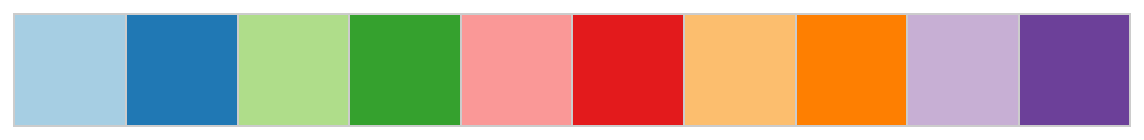

In [2]:
from __future__ import division
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'  # for hi-dpi displays

sns.set_style('whitegrid')
palette = ('Paired', 10)
sns.palplot(sns.color_palette(*palette))
sns.set_palette(*palette)

In [3]:
data = pd.read_csv(data_file).set_index('sample')
data

,n_bursts_all,n_bursts_do,n_bursts_fret,E_kde_w,E_gauss_w,E_gauss_w_sig,E_gauss_w_err,S_kde,S_gauss,S_gauss_sig,S_gauss_err,E_pr_do_kde,E_pr_do_hsm,E_pr_do_gauss,nt_mean
sample,,,,,,,,,,,,,,,
7d,1686,1396,151,0.8430,0.795435,0.089812,0.007309,0.6360,0.601757,0.093175,0.007582,0.0954,0.083806,0.092120,28.148237
12d,1915,722,1092,0.7140,0.706765,0.075569,0.002287,0.5592,0.587225,0.101999,0.003087,0.0916,0.086989,0.091178,27.970313
17d,4501,1045,3276,0.4634,0.447667,0.102266,0.001787,0.5702,0.574012,0.109407,0.001911,0.0950,0.095650,0.095034,29.152810
22d,3456,580,2750,0.2642,0.265565,0.067100,0.001280,0.5634,0.570735,0.109626,0.002090,0.0810,0.084635,0.088650,31.912677
27d,1397,401,943,0.1810,0.183239,0.054042,0.001760,0.6176,0.601480,0.108081,0.003520,0.0798,0.056870,0.081928,23.297139


In [4]:
display(data[['E_pr_do_gauss', 'E_pr_do_kde', 'E_pr_do_hsm', 'n_bursts_do']])
print('KDE Mean (%):     ', data.E_pr_do_kde.mean()*100)
print('KDE Std. Dev. (%):', data.E_pr_do_kde.std()*100)

,E_pr_do_gauss,E_pr_do_kde,E_pr_do_hsm,n_bursts_do
sample,,,,
7d,0.092120,0.0954,0.083806,1396
12d,0.091178,0.0916,0.086989,722
17d,0.095034,0.0950,0.095650,1045
22d,0.088650,0.0810,0.084635,580
27d,0.081928,0.0798,0.056870,401


KDE Mean (%):      8.856
KDE Std. Dev. (%): 0.760578727023


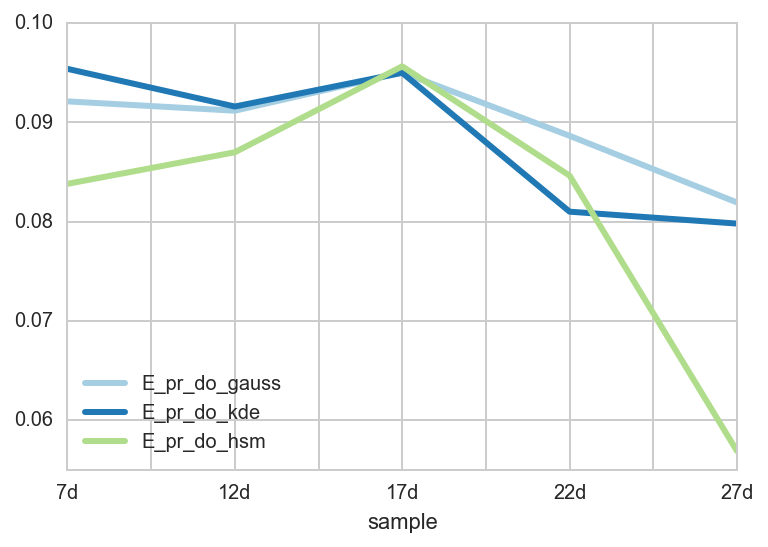

In [5]:
d = data[['E_pr_do_gauss', 'E_pr_do_kde', 'E_pr_do_hsm']]#, 'n_bursts_do']]
d.plot(lw=3);

## Create Leakage Table

In [6]:
E_table = data[['E_pr_do_gauss', 'E_pr_do_kde']]
E_table

,E_pr_do_gauss,E_pr_do_kde
sample,,
7d,0.092120,0.0954
12d,0.091178,0.0916
17d,0.095034,0.0950
22d,0.088650,0.0810
27d,0.081928,0.0798


In [7]:
lk_table = E_table / (1 - E_table)
lk_table.columns = [c.replace('E_pr_do', 'lk') for c in E_table.columns]
lk_table['num_bursts'] = data['n_bursts_do']
lk_table

,lk_gauss,lk_kde,num_bursts
sample,,,
7d,0.101467,0.105461,1396
12d,0.100325,0.100837,722
17d,0.105014,0.104972,1045
22d,0.097273,0.088139,580
27d,0.089239,0.086720,401


## Average leakage coefficient

In [8]:
data.E_pr_do_kde

sample
7d     0.0954
12d    0.0916
17d    0.0950
22d    0.0810
27d    0.0798
Name: E_pr_do_kde, dtype: float64

In [9]:
lk_table.lk_kde

sample
7d     0.105461
12d    0.100837
17d    0.104972
22d    0.088139
27d    0.086720
Name: lk_kde, dtype: float64

In [10]:
E_m = np.average(data.E_pr_do_kde, weights=data.n_bursts_do)
E_m

0.091112065637065656

In [11]:
k_E_m = E_m / (1 - E_m)
k_E_m

0.10024565426861863

In [12]:
k_m = np.average(lk_table.lk_kde, weights=data.n_bursts_do)
k_m

0.10029423815244695

# Conclusions

Either averaging $E_{PR}$ or the corresponding $k = n_d/n_a$ the result for the leakage coefficient is ~10 % (D-only peak fitted finding the maximum of the KDE).

# Save data

## Full table

In [13]:
stats = pd.concat([lk_table.mean(), lk_table.std()], axis=1, keys=['mean', 'std']).T
stats

,lk_gauss,lk_kde,num_bursts
mean,0.098664,0.097226,828.800000
std,0.005952,0.009135,395.214752


In [14]:
table_to_save = lk_table.append(stats)
table_to_save

,lk_gauss,lk_kde,num_bursts
sample,,,
7d,0.101467,0.105461,1396.000000
12d,0.100325,0.100837,722.000000
17d,0.105014,0.104972,1045.000000
22d,0.097273,0.088139,580.000000
27d,0.089239,0.086720,401.000000
mean,0.098664,0.097226,828.800000
std,0.005952,0.009135,395.214752


In [15]:
table_to_save.to_csv('results/table_usalex_5samples_leakage_coeff.csv')

## Average coefficient

In [16]:
'%.5f' % k_m

'0.10029'

In [17]:
with open('results/usALEX - leakage coefficient %s.csv' % bsearch_ph_sel, 'w') as f:
    f.write('%.5f' % k_m)